In [1]:
# Importando bibliotecas
import numpy as np
import pandas as pd

In [2]:
# Leitura do dataset
df = pd.read_csv("data/dataset.csv")

In [3]:
# Retirar linhas com valores vazios (Em 2013 só tem pontos do enduro e totais)
df = df.dropna()
df = df.reset_index(drop=True)

In [4]:
# Verificação dos tipos de dados
df.dtypes

Ano            int64
Posicao        int64
Numero         int64
Equipe        object
Estado        object
Seguranca    float64
Projeto      float64
Dinamicas    float64
Enduro       float64
Total        float64
dtype: object

In [5]:
# Otimizando a alocação de espaço das colunas numéricas
df["Ano"] = pd.to_numeric(df["Ano"], downcast='integer')
df["Numero"] = pd.to_numeric(df["Numero"], downcast='integer')
df["Numero"] = pd.to_numeric(df["Numero"], downcast='float')
df["Seguranca"] = pd.to_numeric(df["Seguranca"], downcast='float')
df["Dinamicas"] = pd.to_numeric(df["Dinamicas"], downcast='float')
df["Enduro"] = pd.to_numeric(df["Enduro"], downcast='float')
df["Total"] = pd.to_numeric(df["Total"], downcast='float')
df.dtypes

Ano            int16
Posicao        int64
Numero          int8
Equipe        object
Estado        object
Seguranca    float32
Projeto      float64
Dinamicas    float32
Enduro       float32
Total        float32
dtype: object

In [6]:
# Pontuação da prova de segurança englobava outras provas até 2014
df = df.drop(df[df['Ano'] < 2014].index).reset_index(drop=True)
df.head()

,Ano,Posicao,Numero,Equipe,Estado,Seguranca,Projeto,Dinamicas,Enduro,Total
0,2014,1,5,MANGUE,PE,0.0,269.57,190.580002,400.000000,860.159973
1,2014,2,6,MANGUE,PE,0.0,267.23,197.580002,365.959991,830.770020
2,2014,3,9,POLI,SP,0.0,241.65,228.229996,280.850006,750.719971
3,2014,4,2,FEI,SP,0.0,272.63,178.800003,280.850006,732.270020
4,2014,5,3,FEI,SP,0.0,267.73,148.339996,314.890015,730.960022


In [7]:
# Criação de uma coluna para categorizar cada equipe com relação a região
condition = [(df['Estado'].isin(['RR', 'AP', 'AM', 'PA', 'AC', 'RO', 'TO'])),
             (df['Estado'].isin(['MA', 'PI', 'CE', 'RN', 'PB', 'PE', 'AL', 'SE', 'BA'])),
             (df['Estado'].isin(['MT', 'DF', 'GO', 'MS'])),
             (df['Estado'].isin(['MG', 'ES', 'RJ', 'SP'])),
             (df['Estado'].isin(['PR', 'SC', 'RS'])),
             (df['Estado'].isin(['-']))]
values = ['Norte', 'Nordeste', 'Centro-oeste', 'Sudeste', 'Sul', 'Fora']
df['Regiao'] = np.select(condition, values)
df = df.drop(df[df['Regiao'] == 'Fora'].index).reset_index(drop=True)
df.head()

,Ano,Posicao,Numero,Equipe,Estado,Seguranca,Projeto,Dinamicas,Enduro,Total,Regiao
0,2014,1,5,MANGUE,PE,0.0,269.57,190.580002,400.000000,860.159973,Nordeste
1,2014,2,6,MANGUE,PE,0.0,267.23,197.580002,365.959991,830.770020,Nordeste
2,2014,3,9,POLI,SP,0.0,241.65,228.229996,280.850006,750.719971,Sudeste
3,2014,4,2,FEI,SP,0.0,272.63,178.800003,280.850006,732.270020,Sudeste
4,2014,5,3,FEI,SP,0.0,267.73,148.339996,314.890015,730.960022,Sudeste


In [8]:
# ax = df.plot.hist(column=["Enduro"], by="Regiao", figsize=(10, 20))

In [9]:
df[["Regiao", "Total"]].groupby('Regiao').describe().sort_values(by=[('Total', 'mean')], ascending=False)

Total                                                       \
              count        mean         std   min        25%         50%   
Regiao                                                                     
Nordeste      102.0  378.335297  279.181793   0.0  85.382502  391.895004   
Sul           111.0  334.961578  243.641830 -10.0  99.375000  361.519989   
Sudeste       368.0  299.743195  244.399872 -10.0  73.792500  273.344986   
Centro-oeste   27.0  180.049255  186.752472   0.0  33.045001   97.489998   
Norte          17.0   39.887650   46.586227   0.0   0.000000   27.799999   

                                      
                     75%         max  
Regiao                                
Nordeste      588.352509  860.159973  
Sul           533.535004  824.289978  
Sudeste       473.389992  884.909973  
Centro-oeste  314.250000  672.140015  
Norte          60.459999  136.339996

<AxesSubplot:title={'center':'Total'}, xlabel='Regiao'>

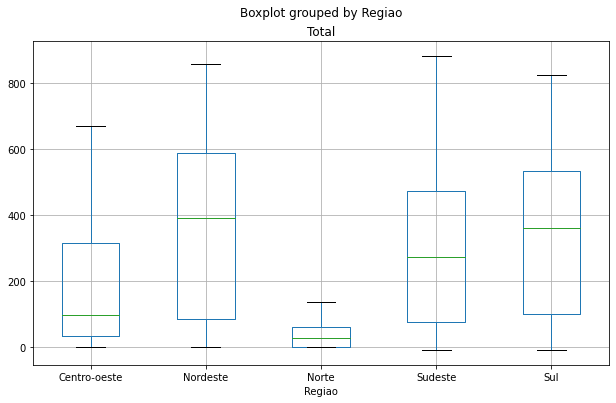

In [10]:
df.boxplot(column=["Total"], by="Regiao", figsize=(10, 6))

In [11]:
df[["Estado", "Total"]].groupby('Estado').describe().sort_values(by=[('Total', 'mean')], ascending=False)

Total                                                             \
        count        mean         std        min         25%         50%   
Estado                                                                     
RN       22.0  537.359619  255.424149   0.000000  417.802498  607.195007   
PE       33.0  529.862366  250.180038   0.000000  390.000000  495.660004   
SC       33.0  457.214264  252.157120   0.000000  327.670013  476.559998   
DF        9.0  342.619995  192.680374  49.599998  303.959991  315.119995   
MG       99.0  333.200317  257.743256 -10.000000   71.340000  321.250000   
SP      172.0  326.015747  251.400208  -5.500000   86.707502  297.380005   
PR       47.0  293.335754  212.782684 -10.000000  115.805000  299.609985   
BA       11.0  289.803619  206.286591   0.000000  138.825005  326.720001   
PB       17.0  285.462952  195.941299   0.000000  170.929993  270.589996   
RS       31.0  267.931946  237.938293   0.000000   23.464999  304.589996   
RJ       79.0  234.454956  198.825912   0.000000   52.949999  201.229996   
ES       18.0  151.223328  180.966766 -10.000000   26.030001   89.154999   
MS       11.0  127.101830  146.437225   0.000000   26.325000   44.799999   
MA        6.0   92.909996   70.932678   0.000000   42.805000   99.650002   
SE        4.0   62.067497   23.279535  38.130001   45.982499   60.049999   
AM       10.0   59.385002   51.940220   0.000000   11.325000   53.395000   
PI        5.0   57.315998   57.909702   0.000000    0.000000   55.000000   
GO        1.0   54.820000         NaN  54.820000   54.820000   54.820000   
MT        6.0   54.134998   56.275391   0.000000    6.582500   40.495000   
CE        2.0   44.250000   35.708893  19.000000   31.625000   44.250000   
AL        2.0   30.655001   43.352718   0.000000   15.327500   30.655001   
PA        7.0   12.034286   14.213922   0.000000    0.000000    3.540000   

                                
               75%         max  
Estado                          
RN      738.079971  824.859985  
PE      779.219971  860.159973  
SC      669.969971  824.289978  
DF      439.899994  672.140015  
MG      540.464996  854.010010  
SP      516.500000  884.909973  
PR      484.759995  647.099976  
BA      403.449997  647.390015  
PB      436.440002  630.250000  
RS      445.970001  724.239990  
RJ      349.565002  729.289978  
ES      212.185005  737.390015  
MS      208.775009  413.820007  
MA      131.152494  192.649994  
SE       76.135000   90.040001  
AM       91.539999  136.339996  
PI      115.559998  116.019997  
GO       54.820000   54.820000  
MT      103.177498  124.470001  
CE       56.875000   69.500000  
AL       45.982501   61.310001  
PA       24.849999   31.000000

<AxesSubplot:title={'center':'Total'}, xlabel='Estado'>

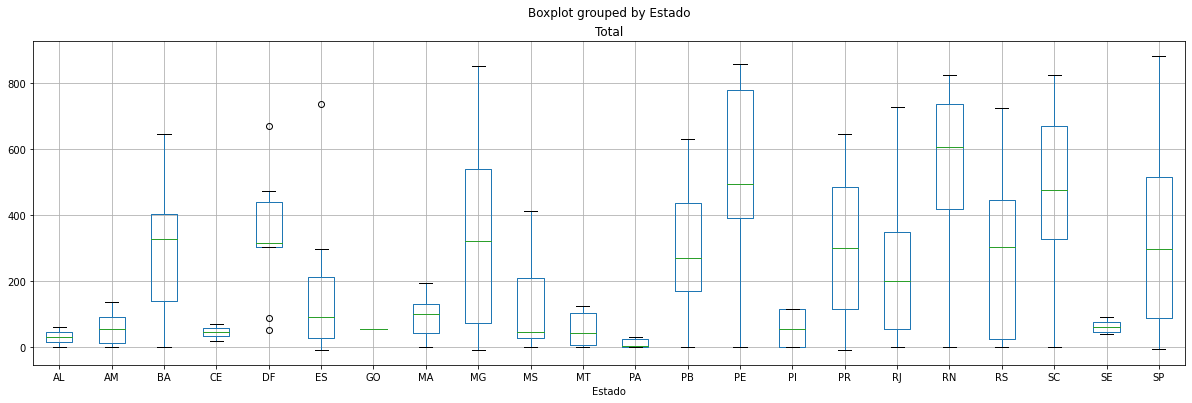

In [12]:
df.boxplot(column=["Total"], by="Estado", figsize=(20, 6))

<AxesSubplot:title={'center':'Total'}, xlabel='Equipe'>

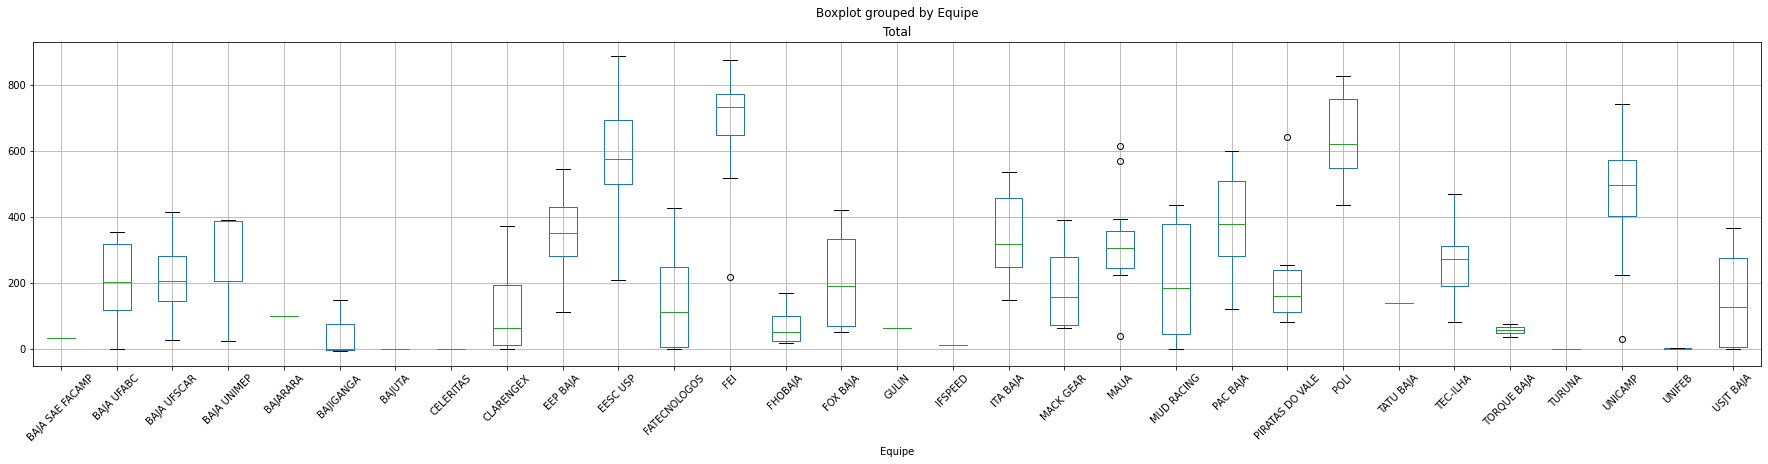

In [13]:
df[df["Estado"] == "SP"].boxplot(column=["Total"], by="Equipe", figsize=(30, 6), rot=45)